In [2]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import scipy
# import cv2
from PIL import Image
import pandas as pd
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.python.framework import ops


import os

train_path = 'Train'

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

ModuleNotFoundError: No module named 'tensorflow'

In [8]:
from keras.utils.np_utils import to_categorical
from keras.layers import  MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D
from keras.models import Sequential

Using TensorFlow backend.


In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

 In 'Train' folder directories are created by class numbers based.
 Train/class_num/class_num_images

<BarContainer object of 43 artists>

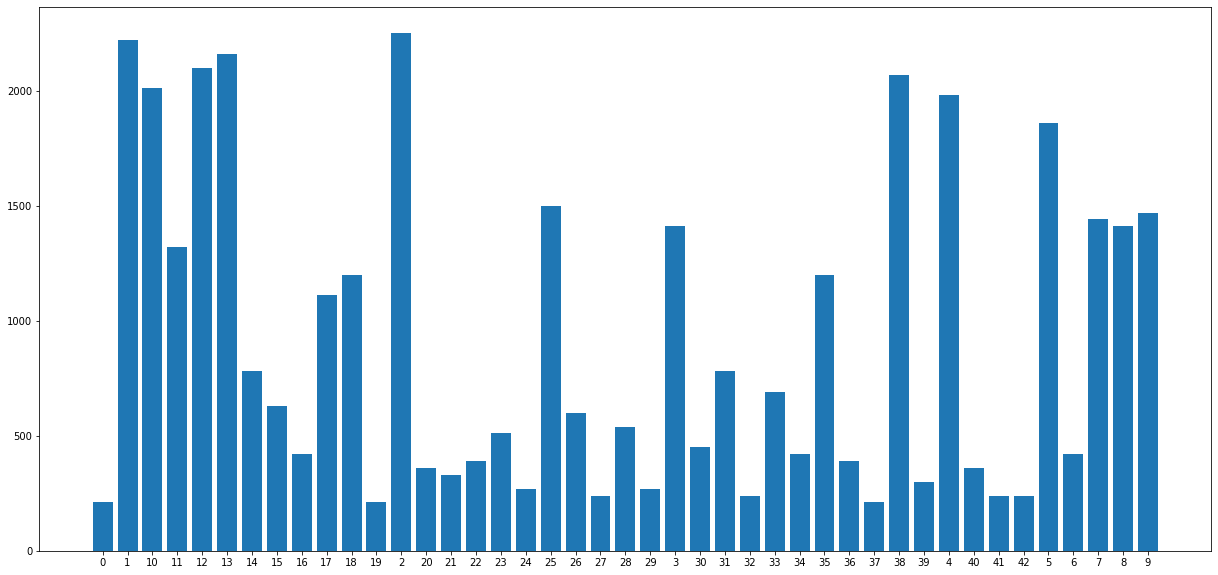

In [2]:
# let's see how many images are there per classes
folders = os.listdir(train_path)
#class_num:no.of samples
samples_dict = {} 

for folder in folders:
    images_in_folder = os.listdir(train_path + '/' + folder)
    samples_dict[folder] = len(images_in_folder)
    
plt.figure(figsize=(21,10))  
plt.bar(*zip(*samples_dict.items()))

In [3]:
print("--> Checking for physical Tensorflow devices")
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

--> Checking for physical Tensorflow devices
: /physical_device:CPU:0
: /physical_device:XLA_CPU:0
: /physical_device:GPU:0
: /physical_device:XLA_GPU:0


**Processing the training data**

In [4]:

    image_data = []
    image_labels = []
    class_num = len(os.listdir(train_path))
    for i in range(class_num):
        path = train_path +'/'+ str(i)
        images = os.listdir(path)

        for img in images:
            try:
                    
                #print(path+'/'+img)
                    image = cv2.imread(path + '/' + img)
                    image_fromarray = Image.fromarray(image, 'RGB')
                    resize_image = image_fromarray.resize((30, 30))
                    image_data.append(np.array(resize_image))
                    image_labels.append(i)
            except:
                print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)
X_train = X_train/255 
X_val = X_val/255

y_train = to_categorical(y_train, class_num)
y_val = to_categorical(y_val, class_num)

print("X_train.shape", X_train.shape)
print("X_valid.shape", X_val.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_val.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367, 43)
y_valid.shape (7842, 43)


# RCNN

In [13]:
classifier = Sequential()
classifier.add(Convolution2D(16, 3, 3, input_shape = (30, 30, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Convolution2D(16, 3, 3, activation = 'relu'))
classifier.add(Flatten())
classifier.add(Dense(256, activation = 'relu'))
classifier.add(Dense(43, activation = 'softmax'))
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [16]:
hist = classifier.fit(X_train, y_train, batch_size=16, epochs=10, shuffle=True, verbose=2, validation_data=(X_val,y_val))

Epoch 1/10
1961/1961 - 6s - loss: 2.2400 - accuracy: 0.3559 - val_loss: 1.5904 - val_accuracy: 0.5080
Epoch 2/10
1961/1961 - 6s - loss: 1.3618 - accuracy: 0.5774 - val_loss: 1.2209 - val_accuracy: 0.6317
Epoch 3/10
1961/1961 - 6s - loss: 1.1443 - accuracy: 0.6440 - val_loss: 1.0781 - val_accuracy: 0.6678
Epoch 4/10
1961/1961 - 6s - loss: 1.0085 - accuracy: 0.6843 - val_loss: 0.9987 - val_accuracy: 0.6771
Epoch 5/10
1961/1961 - 6s - loss: 0.9106 - accuracy: 0.7135 - val_loss: 0.9222 - val_accuracy: 0.7061
Epoch 6/10
1961/1961 - 6s - loss: 0.8394 - accuracy: 0.7355 - val_loss: 0.8572 - val_accuracy: 0.7257
Epoch 7/10
1961/1961 - 6s - loss: 0.7810 - accuracy: 0.7517 - val_loss: 0.8825 - val_accuracy: 0.7313
Epoch 8/10
1961/1961 - 6s - loss: 0.7365 - accuracy: 0.7660 - val_loss: 0.7630 - val_accuracy: 0.7580
Epoch 9/10
1961/1961 - 6s - loss: 0.6950 - accuracy: 0.7807 - val_loss: 0.7252 - val_accuracy: 0.7716
Epoch 10/10
1961/1961 - 6s - loss: 0.6595 - accuracy: 0.7909 - val_loss: 0.7515 - 

In [17]:
classifier.save('rcnn.h5')

# LSTM + CNN

In [21]:

    image_data = []
    image_labels = []
    class_num = len(os.listdir(train_path))
    for i in range(class_num):
        path = train_path +'/'+ str(i)
        images = os.listdir(path)

        for img in images:
            try:
                    
                #print(path+'/'+img)
                    image = cv2.imread(path + '/' + img)
                    image_fromarray = Image.fromarray(image, 'RGB')
                    resize_image = image_fromarray.resize((30, 30))
                    image_data.append(np.array(resize_image))
                    image_labels.append(i)
            except:
                print("Error in " + img)

image_data = np.array(image_data)
image_labels = np.array(image_labels)
print(image_data.shape, image_labels.shape)

(39209, 30, 30, 3) (39209,)


In [22]:
X_train, X_val, X_train, y_val = train_test_split(image_data, image_labels, test_size=0.2, random_state=42, shuffle=True)
X_train = X_train/255 
X_val = X_val/255

In [24]:
y_val.shape

(7842,)

In [28]:
X_train.shape

(31367, 30, 30, 3)

In [25]:
import keras
from keras.models import Sequential
#from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout,LSTM
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import TimeDistributed, Conv2D, MaxPooling2D, Flatten, Dropout, Dense,LSTM

In [26]:
datagen = ImageDataGenerator(
       featurewise_center=False,  
       samplewise_center=False,  
       featurewise_std_normalization=False,  
       samplewise_std_normalization=False,  
       zca_whitening=False,  
       rotation_range = 90, 
       zoom_range = 0.5, 
       width_shift_range=0.2,  
       height_shift_range=0.2,  
       horizontal_flip = True,  
       
)

In [27]:
datagen.fit(X_train)
datagen.fit(X_val)

In [29]:
x_train = np.array(X_train).reshape(31367,1,30,30, 3)
x_test = np.array(X_val).reshape(7842,1,30,30, 3)

In [30]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)

x_train: (31367, 1, 30, 30, 3)
y_train: (31367,)


In [35]:
model = Sequential()
model.add(TimeDistributed(Conv2D(64,(3,3),activation='relu'),input_shape=(1,30,30,3)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

model.add(TimeDistributed(Conv2D(32,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(128,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(Conv2D(56,(3,3),activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))

#model_mix_shoulder.add(TimeDistributed(Conv2D(256,(3,3),activation='relu')))
#model_mix_shoulder.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))


model.add(TimeDistributed(Flatten()))

#RNN
model.add(LSTM(100,return_sequences=False))

model.add(Dense(2,activation='sigmoid'))

In [36]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [37]:
history = model.fit(x_train,y_train,epochs = 25,validation_data = (x_test,y_val),shuffle=True,batch_size=32)

Epoch 1/25
981/981 [==============================] - 25s 25ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 2/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 3/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 4/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 5/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 6/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 7/25
981/981 [==============================] - 24s 24ms/step - loss: nan - accuracy: 0.0055 - val_loss: nan - val_accuracy: 0.0048
Epoch 8/25
981/981 [==============

In [38]:
model.save('cnn-lstm.h5')